In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np

In [2]:
from sklearn.linear_model import LinearRegression

##### Dữ liệu lấy từ Investing.com và bls.gov

In [3]:
df1 = pd.read_csv("giavang.csv")
df2 = pd.read_csv("giadau.csv")
df3 = pd.read_csv("KLgiaodich.csv")
df4 = pd.read_csv("lamphat.csv")
df5 = pd.read_csv("usd.csv")

In [4]:
df3columns_to_drop = ["Mở", "Cao", "Thấp", "Lần cuối","% Thay đổi"]
df3 = df3.drop(columns=df3columns_to_drop ,axis=1)
# df3["Ngày"] = pd.to_datetime(df3["Ngày"],format='%d/%m/%Y')
df3['KL'] = df3['KL'].str.replace('K', '').astype(float) * 1000
# Nếu KL bằng NaN thì xóa cả dòng
for i in range (0,len(df3["KL"])):
    if (np.isnan(df3["KL"][i])==True):
        df3.drop(i, inplace=True)
df3 = df3.reset_index(drop=True)
df3

,Ngày,KL
0,01/04/2024,220770.0
1,28/03/2024,250250.0
2,27/03/2024,191460.0
3,26/03/2024,1590.0
4,25/03/2024,960.0
...,...,...
523,07/03/2022,372190.0
524,04/03/2022,241530.0
525,03/03/2022,180210.0
526,02/03/2022,227980.0


In [5]:
df4["Tháng"] = pd.to_datetime(df4["Tháng"],format='%d/%m/%Y')
df4

,Tháng,% Lạm phát
0,2024-03-01,3.5
1,2024-02-01,3.2
2,2024-01-01,3.1
3,2023-12-01,3.4
4,2023-11-01,3.1
5,2023-10-01,3.2
6,2023-09-01,3.7
7,2023-08-01,3.7
8,2023-07-01,3.2
9,2023-06-01,3.0


In [6]:
df1columns_to_drop = ["Mở", "Cao", "Thấp","KL"]
df1 = df1.drop(columns=df1columns_to_drop ,axis=1)
df1

,Ngày,Lần cuối,% Thay đổi
0,01/04/2024,"2,250.36",0.81%
1,28/03/2024,"2,232.38",1.75%
2,27/03/2024,"2,194.02",0.71%
3,26/03/2024,"2,178.58",0.33%
4,25/03/2024,"2,171.45",0.34%
...,...,...,...
538,07/03/2022,"1,998.11",1.51%
539,04/03/2022,"1,968.45",1.72%
540,03/03/2022,"1,935.21",0.47%
541,02/03/2022,"1,926.11",-0.88%


### Kết hợp 2 dataset lại
   - Xóa đi các ngày không trùng nhau
   - Giữ lại bảng giá dầu cuối ngày và ghép 2 dataset
   - Chuyển các cột về đúng kiểu dữ liệu mong muốn

In [7]:
df1

,Ngày,Lần cuối,% Thay đổi
0,01/04/2024,"2,250.36",0.81%
1,28/03/2024,"2,232.38",1.75%
2,27/03/2024,"2,194.02",0.71%
3,26/03/2024,"2,178.58",0.33%
4,25/03/2024,"2,171.45",0.34%
...,...,...,...
538,07/03/2022,"1,998.11",1.51%
539,04/03/2022,"1,968.45",1.72%
540,03/03/2022,"1,935.21",0.47%
541,02/03/2022,"1,926.11",-0.88%


In [8]:
df3

,Ngày,KL
0,01/04/2024,220770.0
1,28/03/2024,250250.0
2,27/03/2024,191460.0
3,26/03/2024,1590.0
4,25/03/2024,960.0
...,...,...
523,07/03/2022,372190.0
524,04/03/2022,241530.0
525,03/03/2022,180210.0
526,02/03/2022,227980.0


In [9]:
for i in range(0,len(df1["Ngày"])):
    if ((df1["Ngày"][i] in df3["Ngày"].values)==False):
        df1.drop(i, inplace=True)
df1 = df1.reset_index(drop=True)

In [10]:
df1

,Ngày,Lần cuối,% Thay đổi
0,01/04/2024,"2,250.36",0.81%
1,28/03/2024,"2,232.38",1.75%
2,27/03/2024,"2,194.02",0.71%
3,26/03/2024,"2,178.58",0.33%
4,25/03/2024,"2,171.45",0.34%
...,...,...,...
523,07/03/2022,"1,998.11",1.51%
524,04/03/2022,"1,968.45",1.72%
525,03/03/2022,"1,935.21",0.47%
526,02/03/2022,"1,926.11",-0.88%


In [11]:
for i in range(0,len(df3["Ngày"])):
    if ((df3["Ngày"][i] in df1["Ngày"].values)==False):
        df3.drop(i, inplace=True)
df3 = df3.reset_index(drop=True)
df3

,Ngày,KL
0,01/04/2024,220770.0
1,28/03/2024,250250.0
2,27/03/2024,191460.0
3,26/03/2024,1590.0
4,25/03/2024,960.0
...,...,...
523,07/03/2022,372190.0
524,04/03/2022,241530.0
525,03/03/2022,180210.0
526,02/03/2022,227980.0


In [12]:
df3

,Ngày,KL
0,01/04/2024,220770.0
1,28/03/2024,250250.0
2,27/03/2024,191460.0
3,26/03/2024,1590.0
4,25/03/2024,960.0
...,...,...
523,07/03/2022,372190.0
524,04/03/2022,241530.0
525,03/03/2022,180210.0
526,02/03/2022,227980.0


In [13]:
df3.drop(columns=['Ngày'], inplace=True)
result_df13 = pd.concat([df1,df3], axis=1)
result_df13

,Ngày,Lần cuối,% Thay đổi,KL
0,01/04/2024,"2,250.36",0.81%,220770.0
1,28/03/2024,"2,232.38",1.75%,250250.0
2,27/03/2024,"2,194.02",0.71%,191460.0
3,26/03/2024,"2,178.58",0.33%,1590.0
4,25/03/2024,"2,171.45",0.34%,960.0
...,...,...,...,...
523,07/03/2022,"1,998.11",1.51%,372190.0
524,04/03/2022,"1,968.45",1.72%,241530.0
525,03/03/2022,"1,935.21",0.47%,180210.0
526,02/03/2022,"1,926.11",-0.88%,227980.0


In [14]:
result_df13["Ngày"] = pd.to_datetime(result_df13["Ngày"],format='%d/%m/%Y')
result_df13['% Thay đổi'] = result_df13['% Thay đổi'].str.replace('%', '').astype(float)
result_df13['Tăng giảm'] = 0
result_df13

,Ngày,Lần cuối,% Thay đổi,KL,Tăng giảm
0,2024-04-01,"2,250.36",0.81,220770.0,0
1,2024-03-28,"2,232.38",1.75,250250.0,0
2,2024-03-27,"2,194.02",0.71,191460.0,0
3,2024-03-26,"2,178.58",0.33,1590.0,0
4,2024-03-25,"2,171.45",0.34,960.0,0
...,...,...,...,...,...
523,2022-03-07,"1,998.11",1.51,372190.0,0
524,2022-03-04,"1,968.45",1.72,241530.0,0
525,2022-03-03,"1,935.21",0.47,180210.0,0
526,2022-03-02,"1,926.11",-0.88,227980.0,0


In [15]:
for i in range (0,len(result_df13["Tăng giảm"])-1):
    if (result_df13["% Thay đổi"][i] >= 0):
        result_df13["Tăng giảm"][i+1] = 1
result_df13['Tăng giảm'] = result_df13["Tăng giảm"].astype(float)
result_df13

C:\Users\ngduy\AppData\Local\Temp\ipykernel_4268\3725832595.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  result_df13["Tăng giảm"][i+1] = 1
C:\Users\ngduy\AppData\Local\Temp\ipykernel_4268\3725832595.py:3: SettingWithCopyWarning: 
A va

,Ngày,Lần cuối,% Thay đổi,KL,Tăng giảm
0,2024-04-01,"2,250.36",0.81,220770.0,0.0
1,2024-03-28,"2,232.38",1.75,250250.0,1.0
2,2024-03-27,"2,194.02",0.71,191460.0,1.0
3,2024-03-26,"2,178.58",0.33,1590.0,1.0
4,2024-03-25,"2,171.45",0.34,960.0,1.0
...,...,...,...,...,...
523,2022-03-07,"1,998.11",1.51,372190.0,1.0
524,2022-03-04,"1,968.45",1.72,241530.0,1.0
525,2022-03-03,"1,935.21",0.47,180210.0,1.0
526,2022-03-02,"1,926.11",-0.88,227980.0,1.0


In [16]:
df4

,Tháng,% Lạm phát
0,2024-03-01,3.5
1,2024-02-01,3.2
2,2024-01-01,3.1
3,2023-12-01,3.4
4,2023-11-01,3.1
5,2023-10-01,3.2
6,2023-09-01,3.7
7,2023-08-01,3.7
8,2023-07-01,3.2
9,2023-06-01,3.0


In [17]:
x = pd.DataFrame(
    {
        "2022" : [0] *13,
        "2023" : [0] *13,
        "2024" : [0] *13,
        
     }
)
x

,2022,2023,2024
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
5,0,0,0
6,0,0,0
7,0,0,0
8,0,0,0
9,0,0,0


In [18]:
thang = df4["Tháng"][2].month
nam   = str(df4["Tháng"][2].year)
print(thang,nam)

1 2024


In [19]:
for i in range(0,len(df4["Tháng"])):
    thang = df4["Tháng"][i].month
    nam   = str(df4["Tháng"][i].year)
    x.loc[thang, nam] = df4["% Lạm phát"][i]
x

C:\Users\ngduy\AppData\Local\Temp\ipykernel_4268\4067003898.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '3.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  x.loc[thang, nam] = df4["% Lạm phát"][i]
C:\Users\ngduy\AppData\Local\Temp\ipykernel_4268\4067003898.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '3.4' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  x.loc[thang, nam] = df4["% Lạm phát"][i]
C:\Users\ngduy\AppData\Local\Temp\ipykernel_4268\4067003898.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '6.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  x.loc[thang, nam] = df4["% Lạm phát"][i]


,2022,2023,2024
0,0.0,0.0,0.0
1,0.0,6.4,3.1
2,0.0,6.0,3.2
3,8.5,5.0,3.5
4,8.3,4.9,0.0
5,8.6,4.0,0.0
6,9.1,3.0,0.0
7,8.5,3.2,0.0
8,8.3,3.7,0.0
9,8.2,3.7,0.0


In [20]:
result_df = result_df13.copy()
# Tạo một cột mới "Lạm phát" với giá trị mặc định là None
result_df['Lạm phát'] = None
for i in range(0,len(result_df["Lạm phát"])):
    thang = result_df["Ngày"][i].month
    nam = str(result_df["Ngày"][i].year)
    result_df["Lạm phát"][i] = x[nam][thang]

C:\Users\ngduy\AppData\Local\Temp\ipykernel_4268\1450652464.py:7: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  result_df["Lạm phát"][i] = x[nam][thang]
C:\Users\ngduy\AppData\Local\Temp\ipykernel_4268\1450652464.py:7: SettingWithCopyWarning

In [21]:
result_df

,Ngày,Lần cuối,% Thay đổi,KL,Tăng giảm,Lạm phát
0,2024-04-01,"2,250.36",0.81,220770.0,0.0,0.0
1,2024-03-28,"2,232.38",1.75,250250.0,1.0,3.5
2,2024-03-27,"2,194.02",0.71,191460.0,1.0,3.5
3,2024-03-26,"2,178.58",0.33,1590.0,1.0,3.5
4,2024-03-25,"2,171.45",0.34,960.0,1.0,3.5
...,...,...,...,...,...,...
523,2022-03-07,"1,998.11",1.51,372190.0,1.0,8.5
524,2022-03-04,"1,968.45",1.72,241530.0,1.0,8.5
525,2022-03-03,"1,935.21",0.47,180210.0,1.0,8.5
526,2022-03-02,"1,926.11",-0.88,227980.0,1.0,8.5


In [22]:
df2columns_to_drop = ["Mở", "Cao", "Thấp", "KL","% Thay đổi"]
df2 = df2.drop(columns=df2columns_to_drop ,axis=1)
df2["Ngày"] = pd.to_datetime(df2["Ngày"],format='%d/%m/%Y')
df2["Lần cuối"] = df2['Lần cuối'].astype(float)
df2

,Ngày,Lần cuối
0,2024-04-01,84.14
1,2024-03-31,83.45
2,2024-03-28,83.44
3,2024-03-27,82.05
4,2024-03-26,81.61
...,...,...
643,2022-03-02,112.22
644,2022-03-01,107.77
645,NaT,NaN
646,NaT,NaN


In [23]:
for i in range(0,len(result_df["Ngày"])):
    if ((result_df["Ngày"][i] in df2["Ngày"].values)==False):
        result_df.drop(i, inplace=True)
result_df = result_df.reset_index(drop=True)

In [24]:
for i in range(0,len(df2["Ngày"])):
    if ((df2["Ngày"][i] in result_df["Ngày"].values)==False):
        df2.drop(i, inplace=True)
df2 = df2.reset_index(drop=True)

In [25]:
df2.drop(columns=['Ngày'], inplace=True)
df2 = df2.rename(columns={"Lần cuối": "Giá dầu"})
result = pd.concat([result_df,df2], axis=1)
result

,Ngày,Lần cuối,% Thay đổi,KL,Tăng giảm,Lạm phát,Giá dầu
0,2024-04-01,"2,250.36",0.81,220770.0,0.0,0.0,84.14
1,2024-03-28,"2,232.38",1.75,250250.0,1.0,3.5,83.44
2,2024-03-27,"2,194.02",0.71,191460.0,1.0,3.5,82.05
3,2024-03-26,"2,178.58",0.33,1590.0,1.0,3.5,81.61
4,2024-03-25,"2,171.45",0.34,960.0,1.0,3.5,82.38
...,...,...,...,...,...,...,...
523,2022-03-07,"1,998.11",1.51,372190.0,1.0,8.5,122.09
524,2022-03-04,"1,968.45",1.72,241530.0,1.0,8.5,116.37
525,2022-03-03,"1,935.21",0.47,180210.0,1.0,8.5,110.52
526,2022-03-02,"1,926.11",-0.88,227980.0,1.0,8.5,112.22


In [26]:
df5columns_to_drop = ["Mở", "Cao", "Thấp", "KL","% Thay đổi"]
df5 = df5.drop(columns=df5columns_to_drop ,axis=1)
df5["Ngày"] = pd.to_datetime(df5["Ngày"],format='%d/%m/%Y')
df5["Lần cuối"] = df5['Lần cuối'].astype(float)
df5

,Ngày,Lần cuối
0,2024-04-01,105.00
1,2024-03-31,104.50
2,2024-03-29,104.49
3,2024-03-28,104.53
4,2024-03-27,104.43
...,...,...
542,2022-03-07,99.29
543,2022-03-04,98.65
544,2022-03-03,97.79
545,2022-03-02,97.39


In [27]:
for i in range(0,len(result["Ngày"])):
    if ((result["Ngày"][i] in df5["Ngày"].values)==False):
        result.drop(i, inplace=True)
result = result.reset_index(drop=True)

In [28]:
for i in range(0,len(df5["Ngày"])):
    if ((df5["Ngày"][i] in result["Ngày"].values)==False):
        df5.drop(i, inplace=True)
df5 = df5.reset_index(drop=True)

In [29]:
df5.drop(columns=['Ngày'], inplace=True)
df5 = df5.rename(columns={"Lần cuối": "USD"})
final_df = pd.concat([result,df5], axis=1)
final_df

,Ngày,Lần cuối,% Thay đổi,KL,Tăng giảm,Lạm phát,Giá dầu,USD
0,2024-04-01,"2,250.36",0.81,220770.0,0.0,0.0,84.14,105.00
1,2024-03-28,"2,232.38",1.75,250250.0,1.0,3.5,83.44,104.53
2,2024-03-27,"2,194.02",0.71,191460.0,1.0,3.5,82.05,104.43
3,2024-03-26,"2,178.58",0.33,1590.0,1.0,3.5,81.61,104.30
4,2024-03-25,"2,171.45",0.34,960.0,1.0,3.5,82.38,104.23
...,...,...,...,...,...,...,...,...
523,2022-03-07,"1,998.11",1.51,372190.0,1.0,8.5,122.09,99.29
524,2022-03-04,"1,968.45",1.72,241530.0,1.0,8.5,116.37,98.65
525,2022-03-03,"1,935.21",0.47,180210.0,1.0,8.5,110.52,97.79
526,2022-03-02,"1,926.11",-0.88,227980.0,1.0,8.5,112.22,97.39


In [30]:
test_df_result = pd.DataFrame(final_df[::-1].tail(1))

In [31]:
test_df_result

,Ngày,Lần cuối,% Thay đổi,KL,Tăng giảm,Lạm phát,Giá dầu,USD
0,2024-04-01,"2,250.36",0.81,220770.0,0.0,0.0,84.14,105.0


In [32]:
final_df = (final_df.tail(len(final_df)-1))[::-1]
final_df['Lần cuối'] = final_df['Lần cuối'].str.replace(',', '').astype(float)

In [33]:
final_df

,Ngày,Lần cuối,% Thay đổi,KL,Tăng giảm,Lạm phát,Giá dầu,USD
527,2022-03-01,1943.22,1.85,224000.0,0.0,8.5,107.77,97.41
526,2022-03-02,1926.11,-0.88,227980.0,1.0,8.5,112.22,97.39
525,2022-03-03,1935.21,0.47,180210.0,1.0,8.5,110.52,97.79
524,2022-03-04,1968.45,1.72,241530.0,1.0,8.5,116.37,98.65
523,2022-03-07,1998.11,1.51,372190.0,1.0,8.5,122.09,99.29
...,...,...,...,...,...,...,...,...
5,2024-03-22,2164.15,-0.76,640.0,1.0,3.5,81.19,104.43
4,2024-03-25,2171.45,0.34,960.0,1.0,3.5,82.38,104.23
3,2024-03-26,2178.58,0.33,1590.0,1.0,3.5,81.61,104.30
2,2024-03-27,2194.02,0.71,191460.0,1.0,3.5,82.05,104.43


In [34]:
test_df_test= pd.DataFrame(final_df.tail(1))
test_df_test

,Ngày,Lần cuối,% Thay đổi,KL,Tăng giảm,Lạm phát,Giá dầu,USD
1,2024-03-28,2232.38,1.75,250250.0,1.0,3.5,83.44,104.53


#### Giảm chiều bằng PCA và biểu diễn trực quan

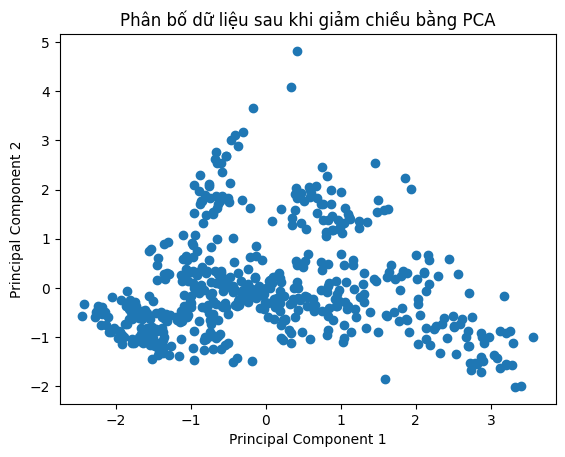

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Loại bỏ cột '% Thay đổi', 'Tăng giảm' và 'Ngày' ra khỏi dữ liệu
final_df_numeric = final_df.drop(columns=['% Thay đổi', 'Tăng giảm', 'Ngày']).select_dtypes(include=[np.number])

# Chuẩn hóa dữ liệu
X = StandardScaler().fit_transform(final_df_numeric)

# Áp dụng PCA với 2 thành phần chính
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Trực quan hóa kết quả
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Phân bố dữ liệu sau khi giảm chiều bằng PCA')
plt.show()

#### Hồi quy tuyến tính

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Xác định các biến độc lập và phụ thuộc
X = final_df[['KL', 'Lạm phát', 'Giá dầu', 'USD']]
y = final_df['Lần cuối']

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)

# Tạo và huấn luyện mô hình hồi quy tuyến tính
regr = LinearRegression()
regr.fit(X_train, y_train)


# Dự đoán giá vàng trên tập kiểm tra
y_pred = regr.predict(X_test)

# Đánh giá mô hình
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R-squared:', r2_score(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))

Mean Squared Error: 2230.6545740986644
R-squared: 0.8444455768166456
Mean Absolute Error: 36.92538160086152


In [37]:
test_df_test_lineardrop = ["Lần cuối", "Ngày", "Tăng giảm","% Thay đổi"]
test_df_test_linear = test_df_test.drop(columns=test_df_test_lineardrop ,axis=1)

In [38]:
# Dự đoán giá cuối cho ngày tiếp theo
predictions = regr.predict(test_df_test_linear)
# In ra kết quả dự đoán
print("Predictions for the next day:")
print(predictions)

Predictions for the next day:
[1970.21425711]


In [39]:
test_df_result

,Ngày,Lần cuối,% Thay đổi,KL,Tăng giảm,Lạm phát,Giá dầu,USD
0,2024-04-01,"2,250.36",0.81,220770.0,0.0,0.0,84.14,105.0


#### Hồi quy Logistic

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [146]:
#cột Tăng giảm của dataframe result_df gồm các giá trị 0,1. Xây dựng mô hình hồi quy Logistic dựa vào các giá trị của cột KL và % Lạm phát để dự đoán giá trị Tăng giảm.
# Chuẩn bị dữ liệu
X = final_df[['KL', 'Lạm phát',"Giá dầu","USD"]]  # Features
y = final_df['Tăng giảm']  # Target variable

# Tạo DataFrame cho biến đầu vào và biến mục tiêu
X = final_df[['KL', 'Lạm phát',"Giá dầu","USD"]] # biến đầu vào
y = final_df['Tăng giảm'] # biến mục tiêu

# Chia dữ liệu thành tập huấn luyện và tập kiểm thử
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=44)

# Xây dựng mô hình hồi quy logistic
log_reg = LogisticRegression()

# Huấn luyện mô hình trên tập huấn luyện
log_reg.fit(X_train, y_train)

# Dự đoán giá trị trên tập kiểm thử
y_pred = log_reg.predict(X_test)

# Đánh giá mô hình
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.5
              precision    recall  f1-score   support

         0.0       0.37      0.55      0.44        29
         1.0       0.65      0.47      0.55        51

    accuracy                           0.50        80
   macro avg       0.51      0.51      0.49        80
weighted avg       0.55      0.50      0.51        80


In [42]:
# Lấy dữ liệu tệp test_df_test làm tập test (dữ liệu ngày 28/3/2024)

In [43]:
testcolumns_to_drop = ["Lần cuối","% Thay đổi","Tăng giảm","Ngày"]
test_df_test_logistic = test_df_test.drop(columns=testcolumns_to_drop ,axis=1)

In [44]:
predictions = log_reg.predict(test_df_test_logistic)
print(predictions)

[0.]


In [45]:
# so với dữ liệu ngày 1/4/2024 trong file, dữ liệu đã tăng so với ngày test (28/3/2024) => hợp lí
test_df_result

,Ngày,Lần cuối,% Thay đổi,KL,Tăng giảm,Lạm phát,Giá dầu,USD
0,2024-04-01,"2,250.36",0.81,220770.0,0.0,0.0,84.14,105.0


#### Phân cụm dữ liệu bằng K-Means

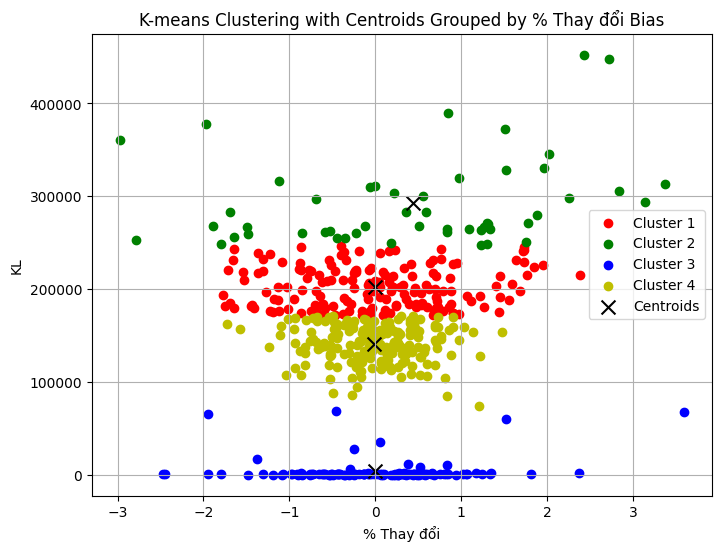

In [253]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Lấy dữ liệu từ DataFrame
data = final_df[['% Thay đổi', 'KL']].values
# Định nghĩa số lượng cụm
k = 4  # Số lượng khoảng thay đổi

# Khởi tạo các centroid theo các giá trị trung bình của từng khoảng cho mỗi feature
centroids_percent_change = np.random.randn(k)
centroids_KL = np.random.randn(k)

# Định nghĩa số lần lặp tối đa
max_iters = 100

for _ in range(max_iters):
    # Gán các điểm dữ liệu vào các cụm dựa trên centroid gần nhất
    clusters = [[] for _ in range(k)]
    for point in data:
        dist_percent_change = np.abs(point[0] - centroids_percent_change)
        dist_KL = np.abs(point[1] - centroids_KL)
        closest_centroid_idx = np.argmin(dist_percent_change + dist_KL)
        clusters[closest_centroid_idx].append(point)

    # Cập nhật các centroid cho mỗi feature
    new_centroids_percent_change = np.array([np.mean([p[0] for p in cluster]) for cluster in clusters])
    new_centroids_KL = np.array([np.mean([p[1] for p in cluster]) for cluster in clusters])

    # Nếu các centroid không thay đổi, dừng
    if np.allclose(new_centroids_percent_change, centroids_percent_change) and np.allclose(new_centroids_KL, centroids_KL):
        break

    centroids_percent_change = new_centroids_percent_change
    centroids_KL = new_centroids_KL

# Visualize clusters
plt.figure(figsize=(8, 6))
colors = ['r', 'g', 'b', 'y']

for i, cluster in enumerate(clusters):
    cluster = np.array(cluster)
    plt.scatter(cluster[:, 0], cluster[:, 1], c=colors[i], label=f'Cluster {i+1}')

plt.scatter(centroids_percent_change, centroids_KL, marker='x', s=100, c='black', label='Centroids')
plt.xlabel('% Thay đổi')
plt.ylabel('KL')
plt.title('K-means Clustering with Centroids Grouped by % Thay đổi Bias')
plt.legend()
plt.grid(True)
plt.show()

In [256]:

import pandas as pd
import numpy as np

# Lấy dữ liệu từ DataFrame
data = final_df['% Thay đổi'].values.reshape(-1, 1)
data1 = final_df['KL']
# Định nghĩa số lượng cụm
k = 4  # Số lượng khoảng thay đổi

# Khởi tạo các centroid theo các giá trị trung bình của từng khoảng
bins = [-float('inf'), -1, 0, 1, float('inf')]
centroids = np.array([[np.mean([x for x in data if bins[i] < x <= bins[i+1]])] for i in range(len(bins)-1)])

# Định nghĩa số lần lặp tối đa
max_iters = 100

for _ in range(max_iters):
    # Gán các điểm dữ liệu vào các cụm dựa trên centroid gần nhất
    clusters = [[] for _ in range(k)]
    for point in data:
        closest_centroid_idx = np.argmin(np.abs(point - centroids))
        clusters[closest_centroid_idx].append(point)

    # Cập nhật các centroid
    new_centroids = np.array([np.mean(cluster) for cluster in clusters])

    # Nếu các centroid không thay đổi, dừng
    if np.allclose(new_centroids, centroids):
        break

    centroids = new_centroids

# In ra các centroid và các cụm tương ứng
for i, centroid in enumerate(centroids):
    print(f"Centroid {i+1}: {centroid}")

    # Tính số lượng điểm dữ liệu trong cụm
    print(f"Cụm {i+1} có {len(clusters[i])} điểm dữ liệu.")

Centroid 1: -1.4626666666666668
Cụm 1 có 60 điểm dữ liệu.
Centroid 2: -0.39880000000000004
Cụm 2 có 200 điểm dữ liệu.
Centroid 3: 0.434433962264151
Cụm 3 có 212 điểm dữ liệu.
Centroid 4: 1.6825454545454543
Cụm 4 có 55 điểm dữ liệu.


#### Phân cụm dữ liệu bằng GMM

In [257]:
from sklearn.mixture import GaussianMixture

class GMMCustom():
    def __init__(self, k, max_iterations=100):
        self.k = k
        self.max_iterations = max_iterations
        self.gmm = None
        self.cluster_labels = None

    def fit(self, data):
        # Khởi tạo và fit GMM model
        self.gmm = GaussianMixture(n_components=self.k, max_iter=self.max_iterations)
        self.gmm.fit(data)

        # Dự đoán nhãn của các cụm
        self.cluster_labels = self.gmm.predict(data)

# Chuẩn bị dữ liệu
data = final_df['% Thay đổi'].values.reshape(-1, 1)

# Định nghĩa số lượng cụm
k = 4  # Số lượng khoảng thay đổi

# Khởi tạo mô hình GMM
gmm_model = GMMCustom(k=k, max_iterations=100)

# Huấn luyện mô hình trên dữ liệu
gmm_model.fit(data)

# In ra thông tin về các cụm từ mô hình GMM
for i in range(k):
    cluster_data = data[gmm_model.cluster_labels == i]
    print(f"Cụm {i+1} có {len(cluster_data)} điểm dữ liệu.")

Cụm 1 có 197 điểm dữ liệu.
Cụm 2 có 62 điểm dữ liệu.
Cụm 3 có 217 điểm dữ liệu.
Cụm 4 có 51 điểm dữ liệu.


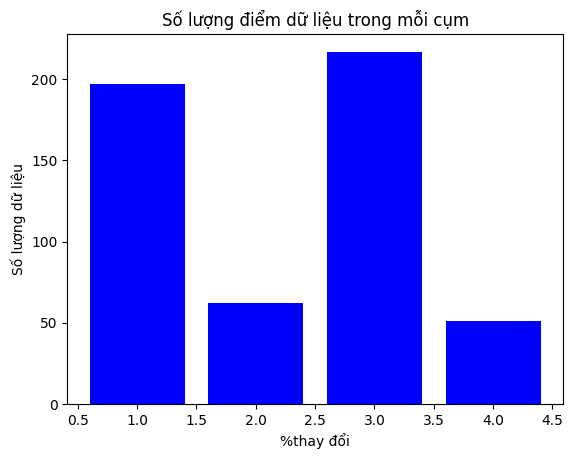

In [258]:
import matplotlib.pyplot as plt

# Đếm số lượng điểm dữ liệu trong mỗi cụm
cluster_counts = [np.sum(gmm_model.cluster_labels == i) for i in range(k)]

# Plot biểu đồ cột
plt.bar(range(1, k+1), cluster_counts, color='blue')

plt.title('Số lượng điểm dữ liệu trong mỗi cụm')
plt.xlabel('%thay đổi')
plt.ylabel('Số lượng dữ liệu')
plt.show()

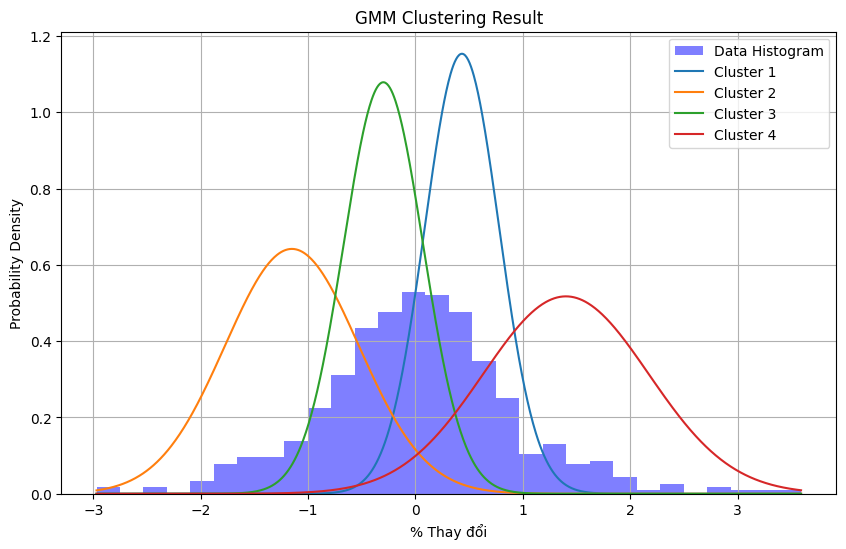

In [260]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Khởi tạo mảng các giá trị trong khoảng của dữ liệu
x = np.linspace(data.min(), data.max(), 1000)

# Trực quan hóa dữ liệu
plt.figure(figsize=(10, 6))
plt.hist(data, bins=30, density=True, alpha=0.5, color='blue', label='Data Histogram')

# Trực quan hóa các phân phối Gaussian cho từng cụm
for i in range(k):
    cluster_data = data[gmm_model.cluster_labels == i]
    mu, std = gmm_model.gmm.means_[i][0], np.sqrt(gmm_model.gmm.covariances_[i][0][0])
    plt.plot(x, norm.pdf(x, mu, std), label=f'Cluster {i+1}')

plt.title('GMM Clustering Result')
plt.xlabel('% Thay đổi')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()

#### Phân loại bằng Multi Class SVM

In [261]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Giả sử bạn đã có DataFrame final_df
# final_df = pd.read_csv('your_data.csv') # nếu bạn đọc từ tệp CSV

# Giả sử bạn đã có DataFrame final_df từ ảnh đã cung cấp

# Tính toán sự thay đổi giá vàng so với ngày trước đó
final_df['Thay đổi'] = final_df['Lần cuối'].diff()

# Tạo nhãn "tăng", "giảm", "không thay đổi"
def create_label(change):
    if change > 0:
        return 'tăng'
    elif change < 0:
        return 'giảm'
    else:
        return 'không thay đổi'

final_df['Nhãn'] = final_df['Thay đổi'].apply(create_label)

# Bỏ các hàng với giá trị NaN do tính toán diff()
final_df = final_df.dropna()

# Xác định các biến độc lập và phụ thuộc
X = final_df[['KL', 'Lạm phát', 'Giá dầu', 'USD']]
y = final_df['Nhãn']

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Chuẩn hóa dữ liệu
scaler_X = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Định nghĩa các siêu tham số để tìm kiếm
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid']
}

# Sử dụng GridSearchCV để tìm kiếm siêu tham số tốt nhất
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2)
grid.fit(X_train_scaled, y_train)

# In ra các siêu tham số tốt nhất
print("Best parameters found: ", grid.best_params_)

# Dự đoán giá vàng trên tập kiểm tra với mô hình tốt nhất
best_svc = grid.best_estimator_
y_pred = best_svc.predict(X_test_scaled)

# Đánh giá mô hình
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1

C:\Users\ngduy\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ngduy\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ngduy\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

#### Phân loại bằng ANN

In [47]:
final_df

,Ngày,Lần cuối,% Thay đổi,KL,Tăng giảm,Lạm phát,Giá dầu,USD
527,2022-03-01,1943.22,1.85,224000.0,0.0,8.5,107.77,97.41
526,2022-03-02,1926.11,-0.88,227980.0,1.0,8.5,112.22,97.39
525,2022-03-03,1935.21,0.47,180210.0,1.0,8.5,110.52,97.79
524,2022-03-04,1968.45,1.72,241530.0,1.0,8.5,116.37,98.65
523,2022-03-07,1998.11,1.51,372190.0,1.0,8.5,122.09,99.29
...,...,...,...,...,...,...,...,...
5,2024-03-22,2164.15,-0.76,640.0,1.0,3.5,81.19,104.43
4,2024-03-25,2171.45,0.34,960.0,1.0,3.5,82.38,104.23
3,2024-03-26,2178.58,0.33,1590.0,1.0,3.5,81.61,104.30
2,2024-03-27,2194.02,0.71,191460.0,1.0,3.5,82.05,104.43


In [130]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,BatchNormalization,Activation
from tensorflow.keras.optimizers import SGD

In [171]:
import tensorflow as tf
from tensorflow.keras import backend as K

def precision(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

In [240]:
X = final_df[["Lần cuối", "KL","Lạm phát","Giá dầu","USD"]]
y = final_df["Tăng giảm"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=38)
model = Sequential()
model.add(Dense(8, input_dim=X_train.shape[1],activation='relu'))
model.add(BatchNormalization())
# model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
# model.add(BatchNormalization())
# model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(32, activation='relu'))
# model.add(BatchNormalization())
# model.add(Dense(16, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(8, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))
optimizer = SGD(learning_rate=0.01)

model.compile(loss="binary_crossentropy",optimizer=optimizer,metrics=['accuracy',precision])
history= model.fit(X_train,y_train, epochs=70,batch_size=16,validation_split=0.3)

C:\Users\ngduy\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/70
17/17 ━━━━━━━━━━━━━━━━━━━━ 8s 59ms/step - accuracy: 0.4873 - loss: 0.8462 - precision: 0.5172 - val_accuracy: 0.5495 - val_loss: 0.6903 - val_precision: 0.7381
Epoch 2/70
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5032 - loss: 0.7608 - precision: 0.5246 - val_accuracy: 0.5045 - val_loss: 0.7088 - val_precision: 0.0000e+00
Epoch 3/70
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6266 - loss: 0.6787 - precision: 0.5758 - val_accuracy: 0.5045 - val_loss: 0.7065 - val_precision: 0.0000e+00
Epoch 4/70
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5629 - loss: 0.6963 - precision: 0.6376 - val_accuracy: 0.5045 - val_loss: 0.7135 - val_precision: 0.0000e+00
Epoch 5/70
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4766 - loss: 0.7694 - precision: 0.5089 - val_accuracy: 0.5045 - val_loss: 0.7145 - val_precision: 0.0000e+00
Epoch 6/70
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4902 - loss: 0.7484 - precision: 0.5106 - val_accuracy: 0.5045 - val

In [247]:
loss,accuracy,precisions = model.evaluate(X_train,y_train,batch_size=16)
loss, accuracy, precisions

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5310 - loss: 0.6994 - precision: 0.5224


(0.6938087940216064, 0.54076087474823, 0.5403462052345276)

In [248]:
loss_test,accuracy_test,precisions_test = model.evaluate(X_test,y_test,batch_size=16)
loss_test,accuracy_test,precisions_test

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5544 - loss: 0.6981 - precision: 0.5365 


(0.7070523500442505, 0.5408805012702942, 0.5571356415748596)

In [249]:
def Accuracy_Graph(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    #plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.subplots_adjust(top=1.00, bottom=0.0, left=0.0, right=0.95, hspace=0.25,
                        wspace=0.35)
    plt.show()

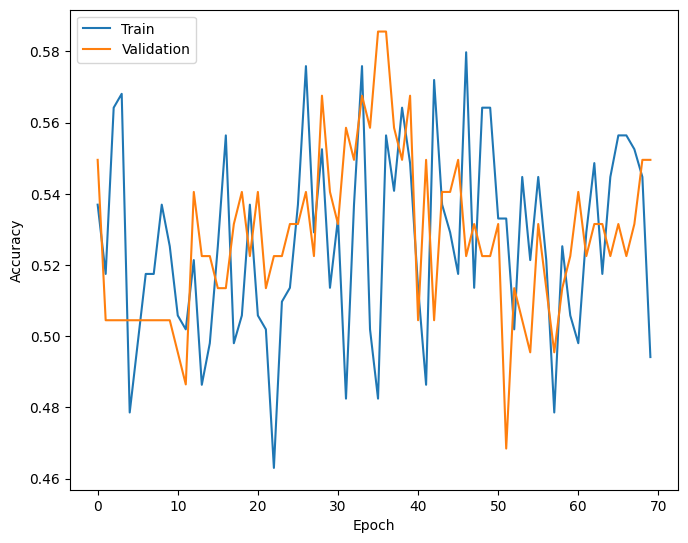

In [250]:
Accuracy_Graph(history)

In [251]:
def Precision_Graph(history):
    plt.plot(history.history['precision'])
    plt.plot(history.history['val_precision'])
    #plt.title('Model accuracy')
    plt.ylabel('Precision')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.subplots_adjust(top=1.00, bottom=0.0, left=0.0, right=0.95, hspace=0.25,
                        wspace=0.35)
    plt.show()

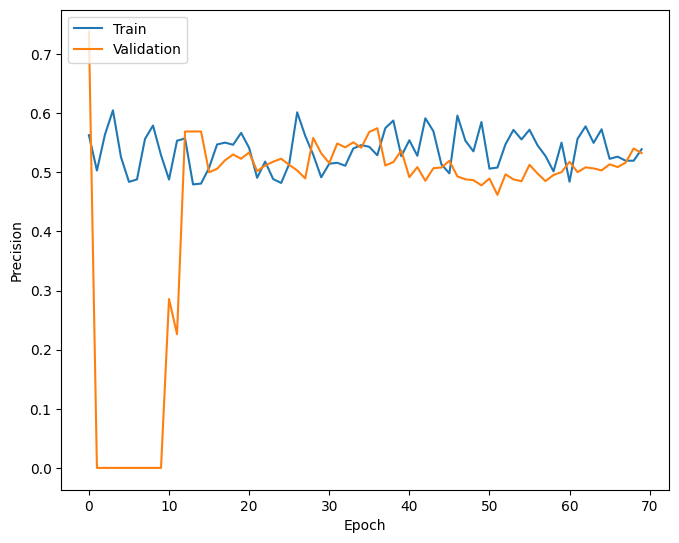

In [252]:
Precision_Graph(history)